In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from evoscape.landscapes import CellDiff_Dataset_Landscape
import evoscape.landscape_visuals as vis
from evoscape.module_helper_functions import transform_coords, rotate_landscape, landscape_from_timecode, modules_from_txt
from evoscape.morphogen_regimes import mr_piecewise
from matplotlib.colors import ListedColormap, BoundaryNorm, CenteredNorm, Normalize
import os


In [2]:
import cmcrameri.cm as cm

from matplotlib import style
style.use('default')

plt.rcParams.update({'figure.dpi': 200})  #200 for high res figures
plt.rcParams.update({'font.size': 15})
plt.rcParams['axes.grid'] = False

In [4]:
data_dir = '../alfyn_results_stage2/saved_files_10/CellDiff_Dataset_Landscape/'
file_name = data_dir + 'optimization_log.csv'

# log = pd.read_csv(file_name, sep='\t', names=['Timecode', 'Init timecode', 'Fitness'], skiprows=1)
log = np.genfromtxt(file_name, delimiter='\t', skip_header=1, names=['Timecode', 'Init_timecode', 'Fitness'], dtype=None, encoding='utf-8')

# fitness threshold for selecting 25% (60)
n_landscapes = 60
fitness_threshold = np.partition(log['Fitness'], -n_landscapes)[-n_landscapes]
print(fitness_threshold)

timecodes = log['Timecode'][log['Fitness'] >= fitness_threshold]
fitnesses = log['Fitness'][log['Fitness'] >= fitness_threshold]
print(len(timecodes))

-0.5686603997246658
60


In [9]:
colors = ('indianred', 'tab:orange', 'gold', 'tab:green', 'tab:blue', 'tab:purple')

def pars_from_timecode(timecode, data_dir, gen):
    par_names = []
    par_colors = []
    filename = data_dir + timecode + '/' + timecode + '_module_list_' + str(gen) + '.txt'
    with open(filename, 'r') as f:
        module_list = modules_from_txt(filename)
    n_modules = len(module_list)

    coords = np.zeros((n_modules, 2))
    for i, module in enumerate(module_list):
        coords[i] = module.x, module.y
    pars = []

    # coords = transform_coords(coords, origin=origin, direction=direction, left=0, bottom=4)     ###
    for i in range(n_modules):
        par_names.append('M'+str(i)+' x')
        par_colors.append(colors[i])
        pars.append(coords[i,0])
        par_names.append('M'+str(i)+' y')
        pars.append(coords[i,1])
        par_colors.append(colors[i])

    for i, module in enumerate(module_list):
        pars.extend(module.a)
        for j in range(len(module.a)):
            par_names.append('M'+str(i)+' a'+ str(j))
            par_colors.append(colors[i])

    for i, module in enumerate(module_list):
        pars.extend(module.s)
        for j in range(len(module.s)):
            par_names.append('M'+str(i)+' s'+ str(j))
            par_colors.append(colors[i])
    # print(par_names)

    return np.array(pars), par_names, par_colors

all_pars = np.zeros((n_landscapes, 72))
gen = 300

for i, timecode in enumerate(timecodes):
    print(timecode)
    all_pars[i, :], par_names, par_colors = pars_from_timecode(timecode, data_dir, gen)

print(par_names)

20250530-162508
20250530-172138
20250530-183729
20250530-210216
20250530-234414
20250531-002107
20250531-004109
20250531-011758
20250531-031025
20250531-040730
20250531-044417
20250531-050416
20250531-060537
20250531-064222
20250531-073758
20250531-081158
20250531-105654
20250531-115250
20250531-121053
20250531-122855
20250531-145452
20250531-174321
20250531-222103
20250601-000710
20250601-002613
20250601-010249
20250601-015532
20250601-041838
20250601-043603
20250601-051221
20250601-053035
20250601-070205
20250601-073856
20250601-091540
20250601-093439
20250601-114857
20250601-134422
20250601-145502
20250601-151343
20250601-155031
20250601-160738
20250601-162538
20250601-204405
20250602-012601
20250602-020156
20250602-031622
20250602-033533
20250602-042754
20250602-062023
20250602-063942
20250602-071802
20250602-073629
20250602-075552
20250602-091439
20250602-100921
20250602-125948
20250602-133728
20250602-152625
20250602-160410
20250602-172416
['M0 x', 'M0 y', 'M1 x', 'M1 y', 'M2 x',

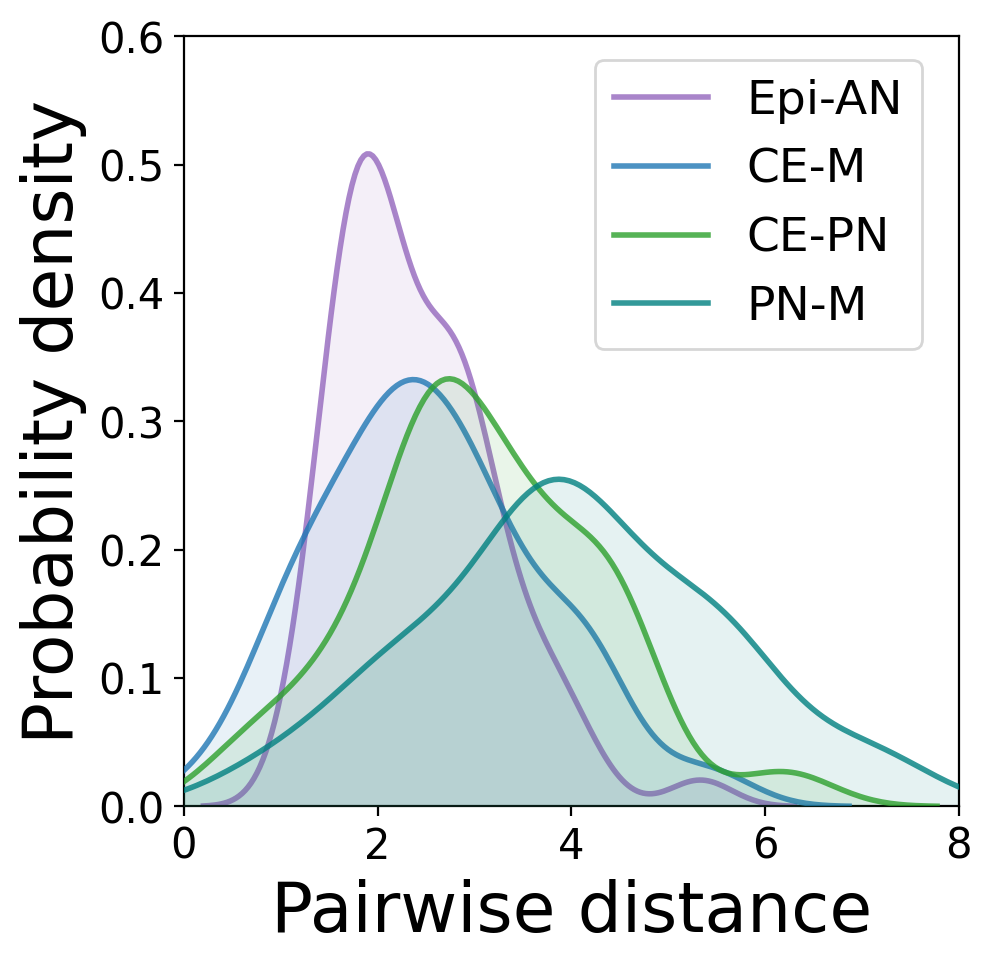

In [7]:
colors = ('indianred', 'tab:orange', 'gold', 'tab:green', 'tab:blue', 'tab:purple')
plt.figure(figsize=(5,5))

# coords0 = np.zeros((n_landscapes, 2))
coords_Epi = all_pars[:,0:2]
coords_Tr = all_pars[:,2:4]
coords_CE = all_pars[:,4:6]
coords_PN = all_pars[:,6:8]
coords_M = all_pars[:,8:10]
coords_AN = all_pars[:,10:12]

sns.kdeplot(np.linalg.norm(coords_AN - coords_Epi, axis = 1), alpha=0.1, color=colors[5], fill=True, lw=0, bw_adjust=0.9)
sns.kdeplot(np.linalg.norm(coords_AN - coords_Epi, axis = 1), alpha=0.8, color=colors[5], label='Epi-AN', lw=2, bw_adjust=0.9)

# sns.kdeplot(np.linalg.norm(coords_Epi - coords_Tr, axis = 1), alpha=0.1, color=colors[0], fill=True, lw=0, bw_adjust=0.9)
# sns.kdeplot(np.linalg.norm(coords_Epi - coords_Tr, axis = 1), alpha=0.7, color=colors[0], label='Epi-Tr', lw=2, bw_adjust=0.9)

# sns.kdeplot(np.linalg.norm(coords_Epi - coords_CE, axis = 1), alpha=0.1, color=colors[0], fill=True, lw=0, bw_adjust=0.9)
# sns.kdeplot(np.linalg.norm(coords_Epi - coords_CE, axis = 1), alpha=0.7, color=colors[0], label='Epi-Tr', lw=2, bw_adjust=0.9)
#
# sns.kdeplot(np.linalg.norm(coords_CE - coords_Tr, axis = 1), alpha=0.1, color=colors[2], fill=True, lw=0, bw_adjust=0.9)
# sns.kdeplot(np.linalg.norm(coords_CE - coords_Tr, axis = 1), alpha=0.7, color=colors[2], label='Tr-CE', lw=2, bw_adjust=0.9)

# sns.kdeplot(np.abs(all_pars[:, 0]), alpha=0.7, color=colors[0], label='Epi-CE', lw=2, bw_adjust=0.9)

sns.kdeplot(np.linalg.norm(coords_M - coords_CE,axis=1),  alpha=0.1, color=colors[4], fill=True, lw=0, bw_adjust=0.9,zorder=50)
plt.xlim((0, 8))
sns.kdeplot(np.linalg.norm(coords_M - coords_CE, axis = 1), alpha=0.8, color=colors[4], label='CE-M', lw=2, bw_adjust=0.9, zorder=50)


sns.kdeplot(np.linalg.norm(coords_PN - coords_CE, axis = 1), alpha=0.1, color=colors[3], fill=True, lw=0, bw_adjust=0.9,zorder=100)
sns.kdeplot(np.linalg.norm(coords_PN - coords_CE, axis = 1), alpha=0.8, color=colors[3], label='CE-PN', lw=2, bw_adjust=0.9, zorder=100)

sns.kdeplot(np.linalg.norm(coords_PN - coords_M, axis = 1), alpha=0.1,color='teal', fill=True, lw=0, bw_adjust=0.9)
sns.kdeplot(np.linalg.norm(coords_PN - coords_M, axis = 1), alpha=0.8,color='teal', label='PN-M', lw=2, bw_adjust=0.9, zorder=200)


plt.xlim((0, 8))
plt.xlabel('Pairwise distance', fontsize=25)
plt.ylabel('Probability density', fontsize=25)
plt.legend(bbox_to_anchor=(0.5,1), fontsize=17)
plt.ylim((0, 0.6))
plt.show()

In [ ]:
    # cmap_signals = cm.batlow
    # colors_signals= cmap_signals((0., 0.2, 0.7, 0.4, 0.9))

M0 s1
M0 s3
M0 s2
M0 s4
M0 a1 M0 s1
M0 a3 M0 s3
M0 a2 M0 s2
M0 a4 M0 s4


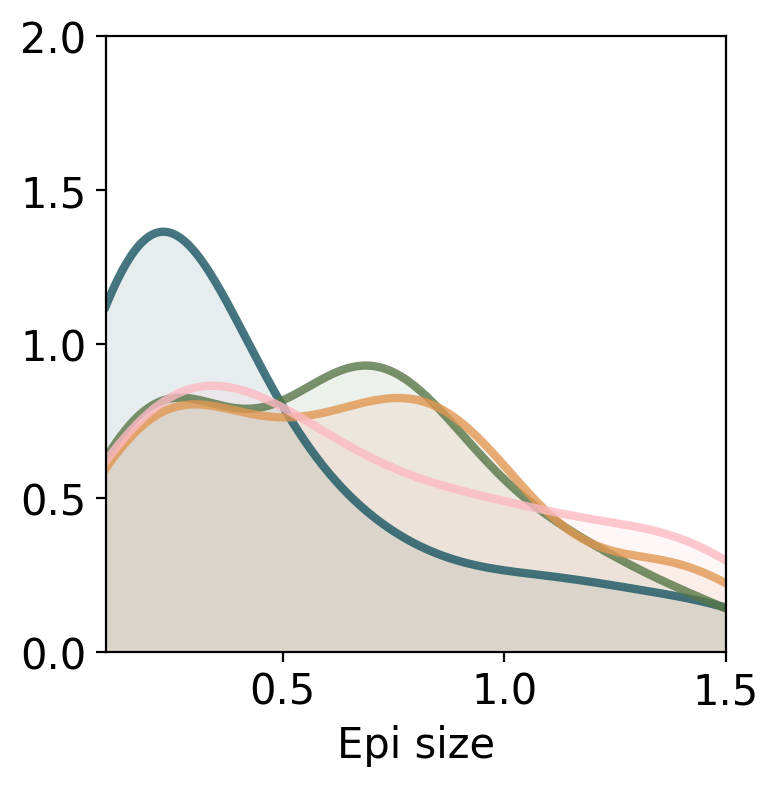

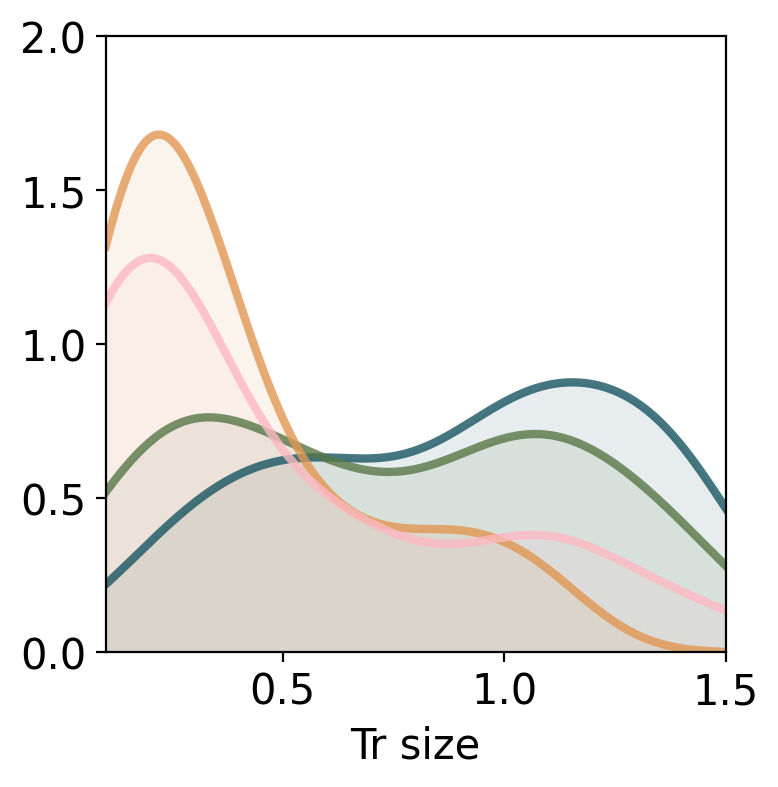

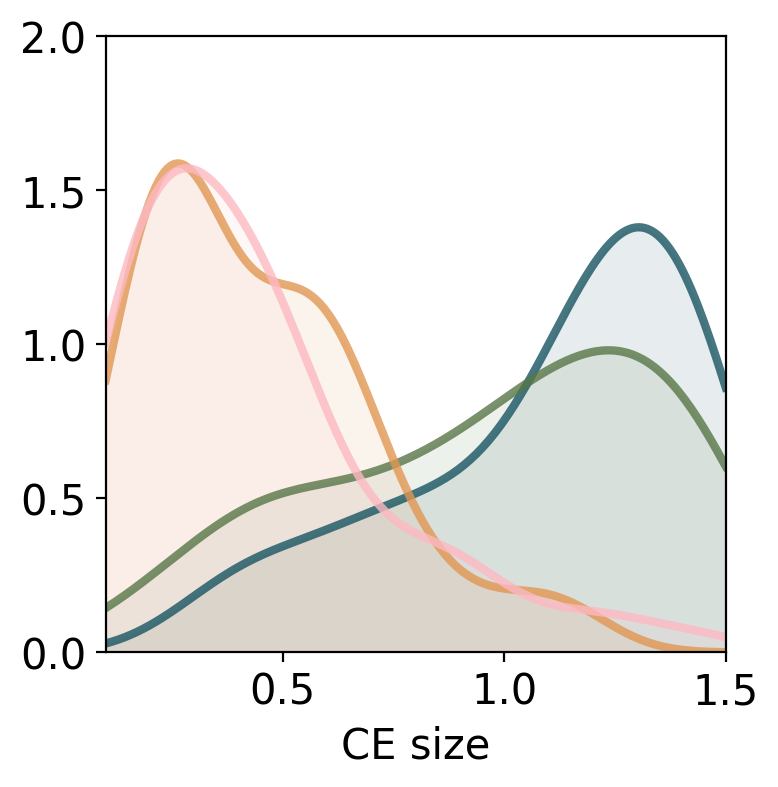

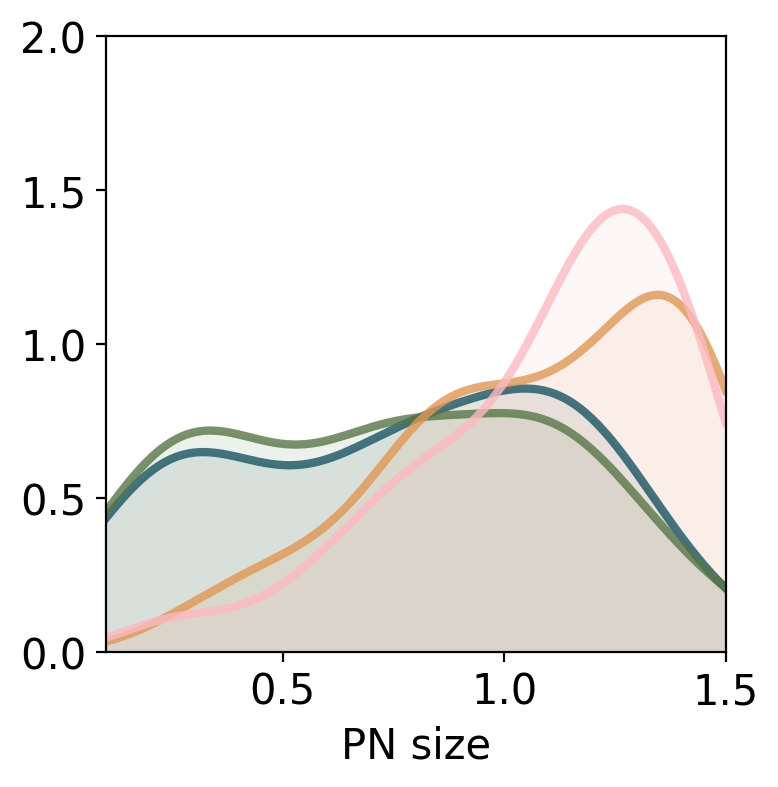

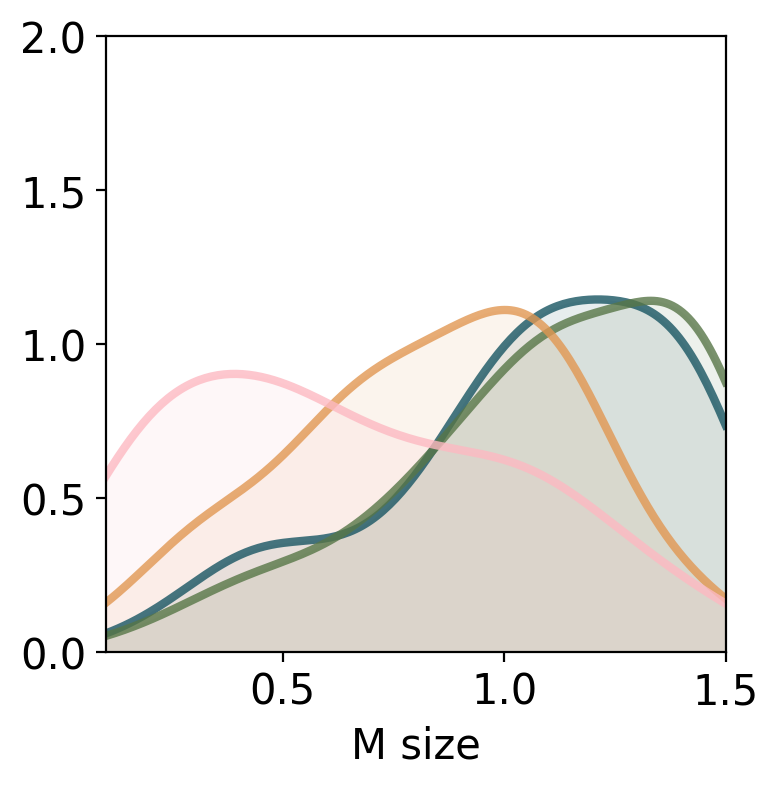

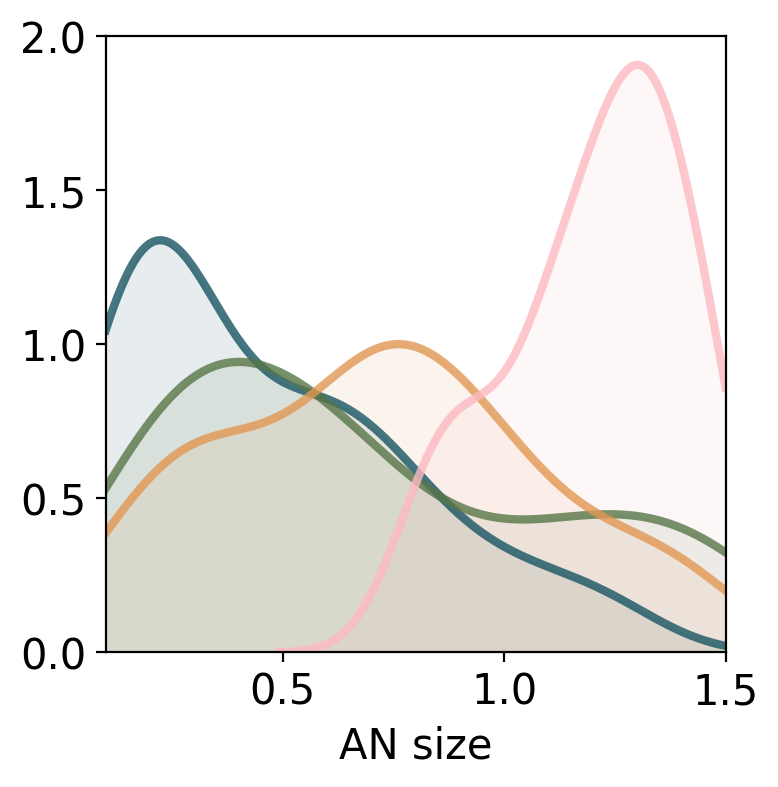

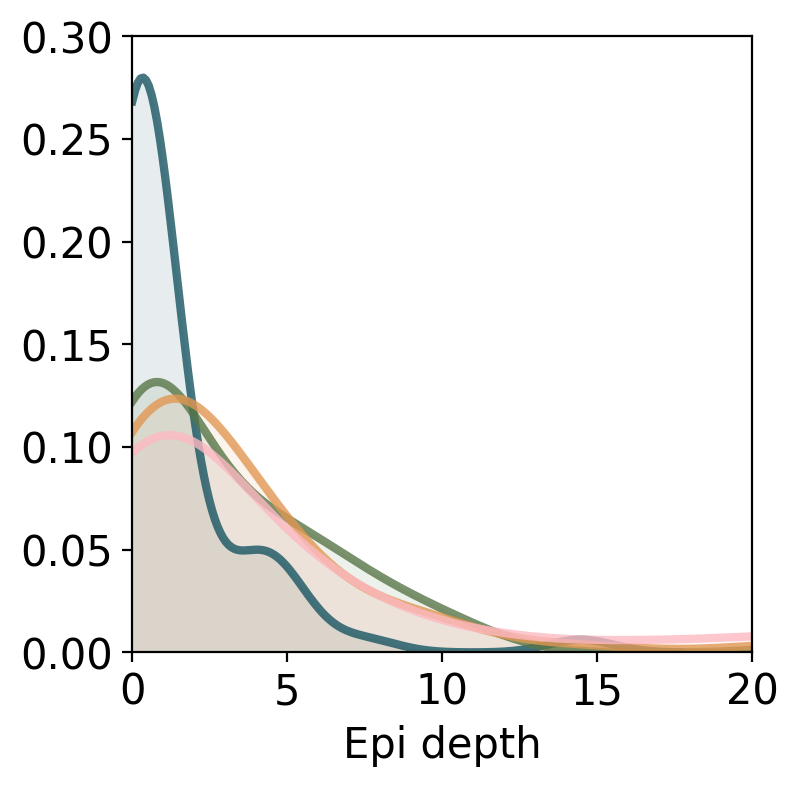

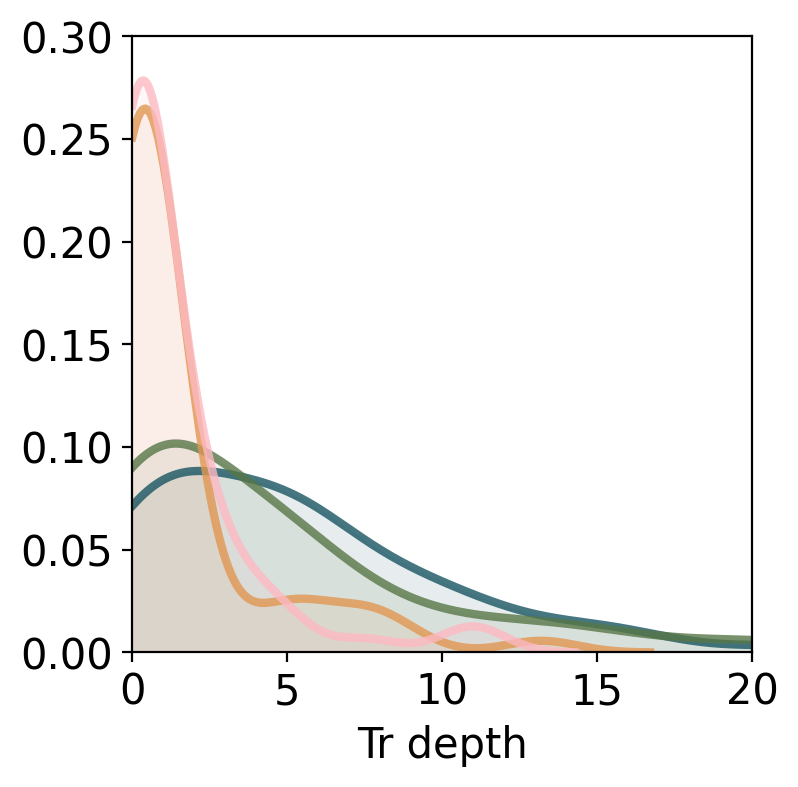

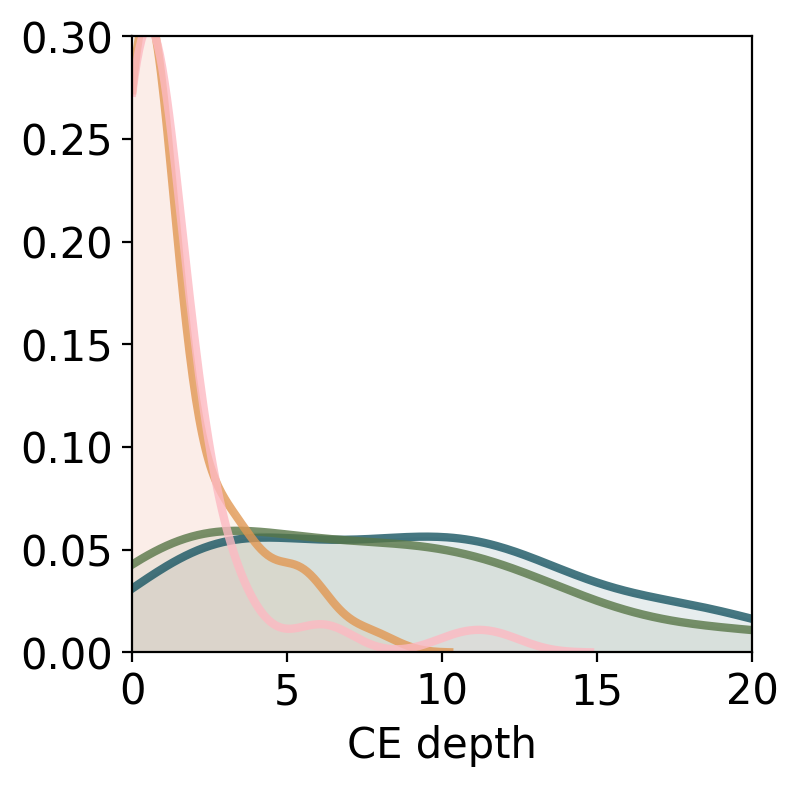

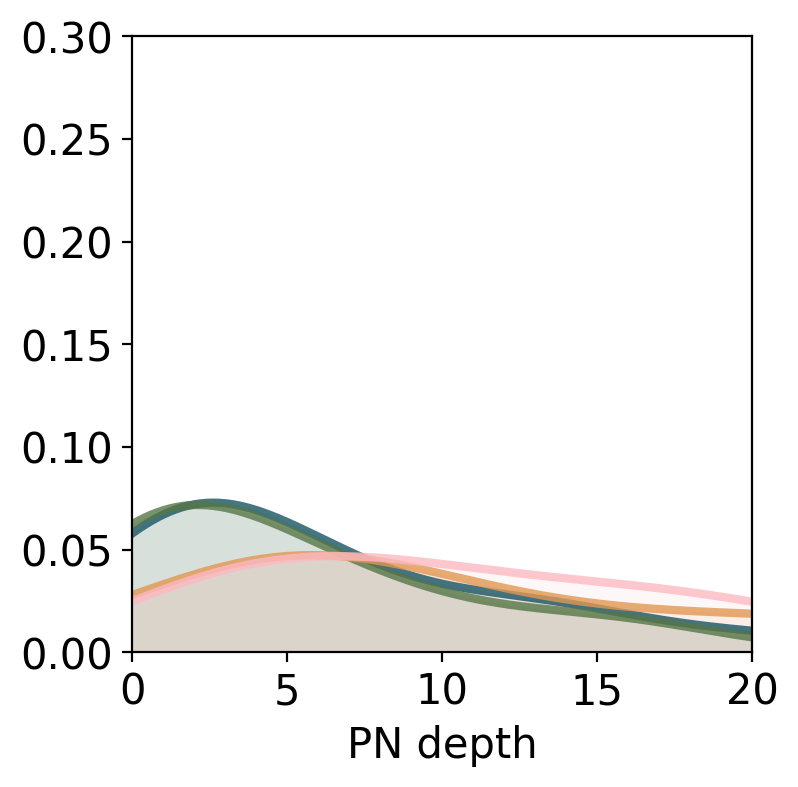

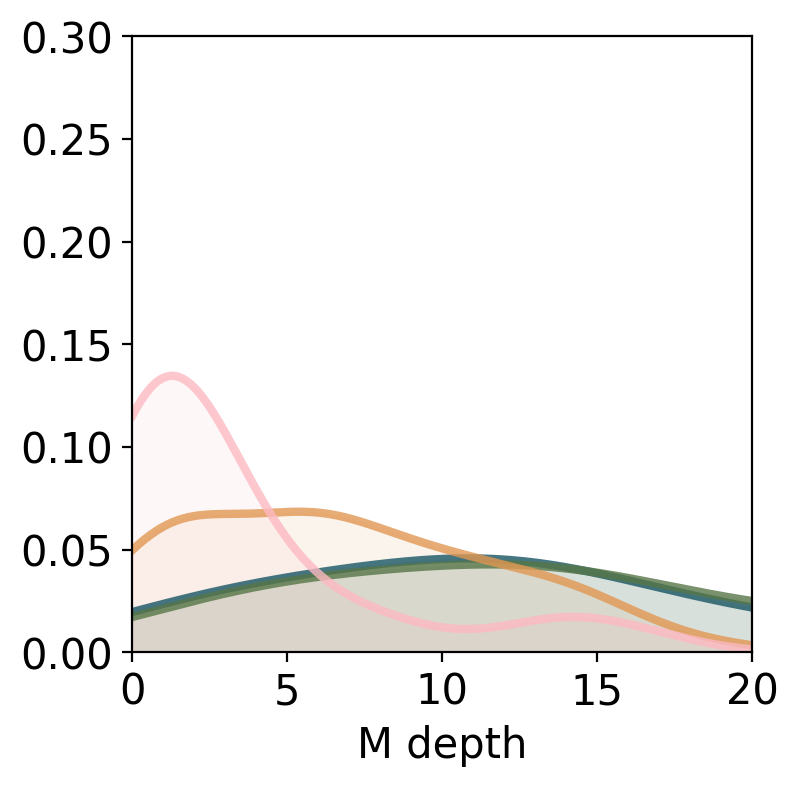

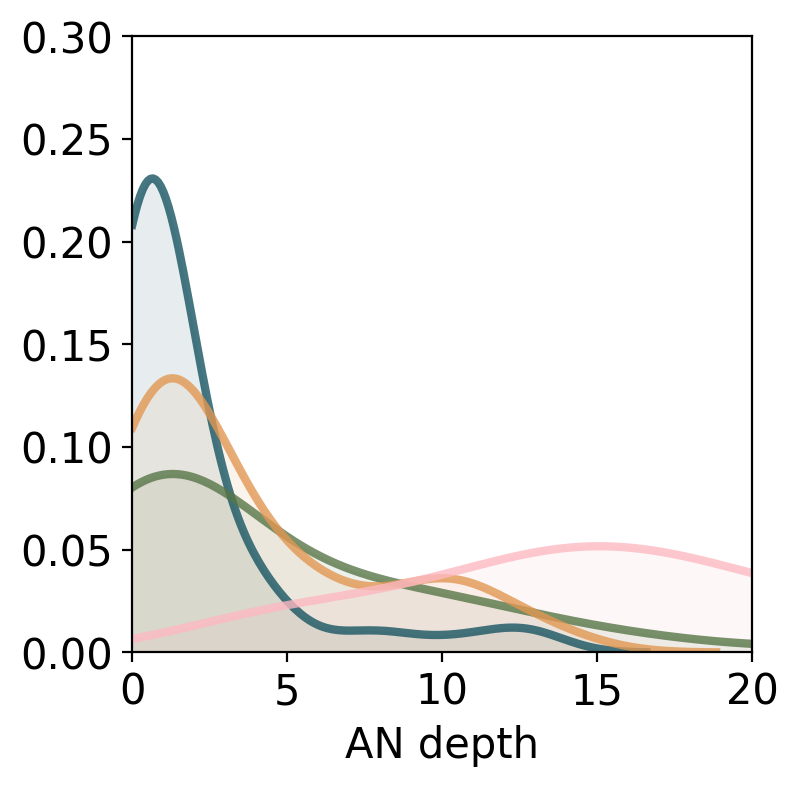

In [43]:
# cmap = colormaps['plasma']
cmap = cm.batlow
colors = cmap((0., 0.2, 0.7, 0.4, 0.9))

regimes = ('FGF', 'CHIR\n+FGF', 'CHIR', 'CHIR+\nend.FGF', 'end.FGF')
regimes_1line = ('FGF', 'CHIR+FGF', 'CHIR', 'CHIR+end.FGF', 'end.FGF')
module_labels = ('Epi', 'Tr', 'CE', 'PN', 'M', 'AN')

start_ind = 12

# for m in range(6):
#     fig, ax = plt.subplots(1, 1, figsize=(4,4))
#     for j in (1, 3, 2, 4):
#         ind = start_ind + m*5 + j
#         sns.kdeplot(data=all_pars[:, ind], alpha=0.1, color=colors[j], clip=(0, 16), fill=True, lw=0)
#         sns.kdeplot(data=all_pars[:, ind], alpha=0.8, color=colors[j], clip=(0, 16), fill=False, label=regimes_1line[j], lw=3)
#         if m == 0:
#             print(par_names[ind])
#     plt.xlim((0,16))
#     plt.ylim((0, 0.2))
#     plt.xlabel(module_labels[m] + ' strength')
#     plt.ylabel('Probability density')
#     plt.legend( bbox_to_anchor=(-.25, 1))
#
start_ind = 12+5*6

for m in range(6):
    fig, ax = plt.subplots(1, 1, figsize=(4,4))
    for j in (1, 3, 2, 4):
        ind = start_ind + m*5 + j
        sns.kdeplot(data=all_pars[:, ind], alpha=0.1, color=colors[j], clip=(0.1, 1.5), fill=True, lw=0)
        sns.kdeplot(data=all_pars[:, ind], alpha=0.8, color=colors[j], clip=(0.1, 1.5), fill=False, label=regimes_1line[j], lw=3)
        if m == 0:
            print(par_names[ind])
    plt.xlim((0.1,1.5))
    plt.ylim((0, 2))
    plt.xlabel(module_labels[m] + ' size')
    # plt.ylabel('Probability density')
    plt.ylabel('')
    # plt.legend( bbox_to_anchor=(-.25, 1))

start_ind = 12

for m in range(6):
    fig, ax = plt.subplots(1, 1, figsize=(4,4))
    for j in (1, 3, 2, 4):
        ind = start_ind + m*5 + j
        ind_s = ind + 30
        sns.kdeplot(data=all_pars[:, ind]*all_pars[:, ind_s]**2, alpha=0.1, color=colors[j], clip=(0., 20), fill=True, lw=0)
        sns.kdeplot(data=all_pars[:, ind]*all_pars[:, ind_s]**2, alpha=0.8, color=colors[j], clip=(0., 20), fill=False, label=regimes_1line[j], lw=3)
        if m == 0:
            print(par_names[ind], par_names[ind_s])
    plt.xlim((0.,20))
    plt.ylim((0, 0.3))
    plt.xlabel(module_labels[m] + ' depth')
    # plt.ylabel('Probability density')
    plt.ylabel('')
    # plt.legend( bbox_to_anchor=(-.25, 1))

# x = np.ones(60)
# for m in range(6):
#     fig, ax = plt.subplots(1, 1, figsize=(6,4))
#     for ord, j in enumerate((1, 3, 2)):
#         ind = start_ind + m*5 + j
#         ind_s = ind + 30
#         plt.scatter(x*ord+1, all_pars[:, ind]*all_pars[:, ind_s]**2, alpha=0.1, color=colors[j], marker='o', label=regimes_1line[j])
#         if m == 0:
#             print(par_names[ind], par_names[ind_s])
#     idx = [start_ind + m*5 + 1, start_ind + m*5 + 3, start_ind + m*5 + 2]
#     idx_s = [start_ind + m*5 + 31, start_ind + m*5 + 33, start_ind + m*5 + 32]
#     for l in range(60):
#         plt.plot(range(1,4), all_pars[l, idx]*all_pars[l, idx_s]**2, '--', c='k', alpha=0.2, lw=1)
#     plt.xlim((0, 4))
#     plt.ylim((0, 25))
#     plt.xlabel('FGF level')
#     plt.ylabel(module_labels[m] + ' depth')
#     plt.legend( bbox_to_anchor=(-.25, 1))
